In [2]:
import pickle as pkl
import matplotlib.pyplot as plt

with open("unet_eval_train_2/epoch_493_train.pkl", "rb") as f:
    result_dict = pkl.load(f)

In [52]:
result_dict.keys()

dict_keys(['original', 'denoised'])

In [3]:
import torch

x, x_hat = result_dict['original'].to('cpu'), result_dict['denoised'].to('cpu')

In [4]:
x

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 1., 1.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 1., 1.]]])

In [5]:
x_hat

tensor([[[  9.0161,   4.1182,   1.7924,  ...,   3.5672,   6.3178,   1.0863],
         [ 10.3506,  -6.0951,   2.4688,  ...,  -7.6882,  -1.9862,   1.1456],
         [ -0.2525,   2.9953,   4.8226,  ..., -18.5870,  15.9804,  16.5988],
         ...,
         [  1.5647,   2.6001,   7.1255,  ...,   6.4865, -10.8115,  13.4851],
         [  5.5961,   1.7499,  -3.4556,  ...,  -4.2527,  -8.6997,  -3.4706],
         [  6.6942,  -4.7506,   8.5320,  ...,   1.5571,   4.7723,   7.7325]],

        [[  1.7874,   0.4831,   0.2287,  ...,  -1.9686,  -0.4599,  -0.4432],
         [ -2.3807,  -2.2714,  -0.1966,  ...,  -1.0100,   1.6905,  -1.7097],
         [  1.7944,  -2.8094,  -0.3075,  ...,   1.2364,  -0.4739,   3.2335],
         ...,
         [  4.2495,   0.3384,   6.0935,  ...,   2.5921,  -3.4484,   5.1320],
         [  3.0431,  -1.6368,  -1.0002,  ...,  -0.9655,   2.0857,   2.7367],
         [ -2.7587,   1.1364,   0.5316,  ...,   3.2849,   0.4680,   3.0367]]])

In [6]:
x_hat_result = torch.argmax(torch.softmax(x_hat, dim=1), dim=1)
x_result = torch.argmax(x, dim=1)

In [7]:
x_result

tensor([[17, 17, 17,  ..., 19, 19, 19],
        [17, 17, 17,  ..., 19, 19, 19]])

In [8]:
x_hat_result

tensor([[13, 16,  3,  ..., 16,  2,  2],
        [ 5,  3, 17,  ..., 14,  3,  9]])

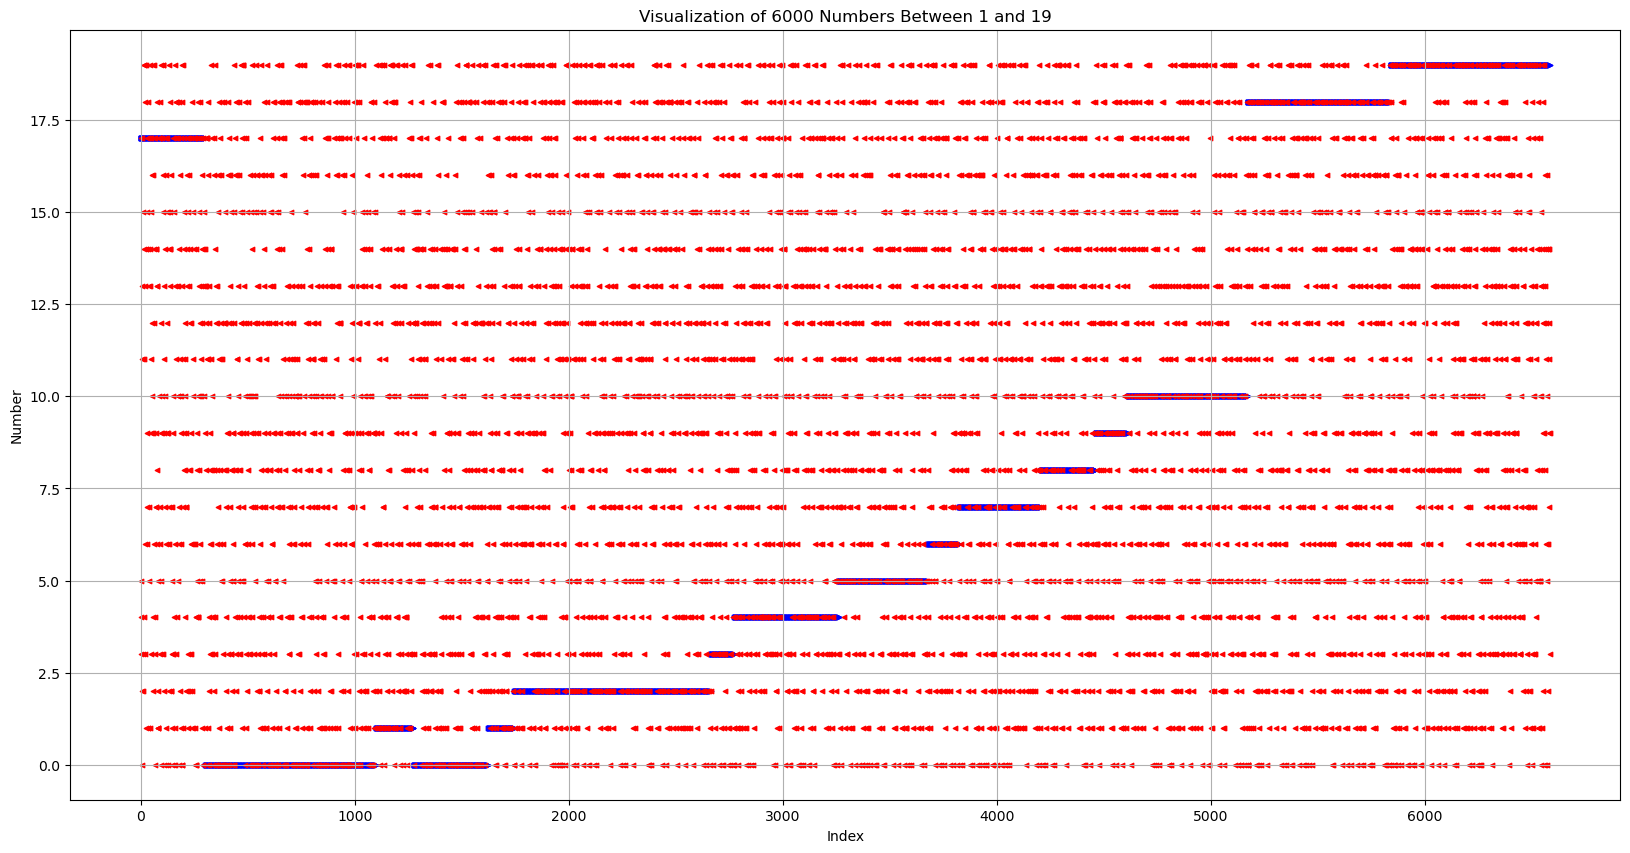

In [9]:
import matplotlib.pyplot as plt
import numpy as np

data = x_result[-1]
data2 = x_hat_result[-1]

plt.figure(figsize=(20, 10))
plt.scatter(range(len(data)), data, marker='>', c='b', s=10)
plt.scatter(range(len(data2)), data2, marker='<', c='r', s=10)

plt.xlabel('Index')
plt.ylabel('Number')
plt.title('Visualization of 6000 Numbers Between 1 and 19')
plt.grid(True)

plt.show()